<a href="https://colab.research.google.com/github/wanjanhasan/Fithusiast/blob/main/Lab2CSE423.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [253]:
!pip install tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [254]:
!pip install -q lucid>=0.2.3
!pip install -q moviepy

In [255]:
import numpy as np
import json
import moviepy.editor as mvp
from google.colab import files
import tensorflow.compat.v1.gfile as gfile
import lucid.misc.io.showing as show

In [256]:
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 1000,800
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [282]:
gl.glClear(gl.GL_COLOR_BUFFER_BIT)

gl.glColor3f(.9,.3,.4)
gl.glPointSize(5)

In [258]:
def findZone(x0, y0, x1, y1):
  dx=x1-x0
  dy=y1-y0
  
  if(abs(dx)>abs(dy)): 
    #zone 0/3/4/7
    if(dx>=0 and dy>=0):
      return 0
    if(dx>=0 and dy<0):
      return 7
    if(dx<0 and dy>=0):
      return 3
    if(dx<0 and dy<0):
      return 4

  else:       
    #zone1/2/5/6
    if(dx>=0 and dy>=0):
      return 1
    if(dx>=0 and dy<0):
      return 6
    if(dx<0 and dy>=0):
      return 2
    if(dx<0 and dy<0):
      return 5

In [259]:
def convertToZone0(x0, y0, x1, y1, zone):
  #if zone==0:
    #return x0, y0, x1, y1
  if zone==1:
    return y0, x0, y1, x1
  elif zone==2:
    return -y0, x0, -y1, x1
  elif zone==3:
    return -x0, y0, -x1, y1
  elif zone==4:
    return -x0, -y0, -x1, -y1
  elif zone==5:
    return -y0, -x0, -y1, -x1
  elif zone==6:
    return y0, -x0, y1, -x1
  else:
    return x0, -y0, x1, -y1

In [260]:
def mapToOriginal(x, y, zone):
  if zone==0:
    return x, y
  elif zone==1:
    return y, x
  elif zone==2:
    return -y, x
  elif zone==3:
    return -x, y
  elif zone==4:
    return -x, -y
  elif zone==5:
    return -y, -x
  elif zone==6:
    return y, -x
  else:
    return x, -y

In [264]:
def midpointLineAlgo(x0, y0, x1, y1):
  zone=findZone(x0, y0, x1, y1)                    #pass params
  #print(zone)
  if zone!=0:
    x0, y0, x1, y1=convertToZone0(x0, y0, x1, y1, zone)               #set params
  #actual algorithm part
  dx=x1-x0
  dy=y1-y0
  d=2*dy-dx
  incE= 2*dy
  incNE=2*(dy-dx)
  y=y0
  x=x0
  gl.glBegin(gl.GL_POINTS)
  while (x<=x1):
    a, b=mapToOriginal(x, y, zone)
    gl.glVertex2f(a, b)
    if(d>0):
      d=d +incNE
      y+=0.01 
    else:
      d=d+incE
    x+=0.01
  gl.glEnd()

In [283]:
#ID:18201133
midpointLineAlgo(-0.4, 0.3, 0, 0.3)
midpointLineAlgo(-0.4, 0, 0, 0)
midpointLineAlgo(-0.4, -0.3, 0, -0.3)
midpointLineAlgo(0, -0.3, 0, 0.3)    

midpointLineAlgo(0.2, 0.3, 0.6, 0.3)
midpointLineAlgo(0.2, 0, 0.6, 0)
midpointLineAlgo(0.2, -0.3, 0.6, -0.3)
midpointLineAlgo(0.6, -0.3, 0.6, 0.3)    

In [280]:
#midpointLineAlgo(-0.3, 0.3, 0.8, 0.7)


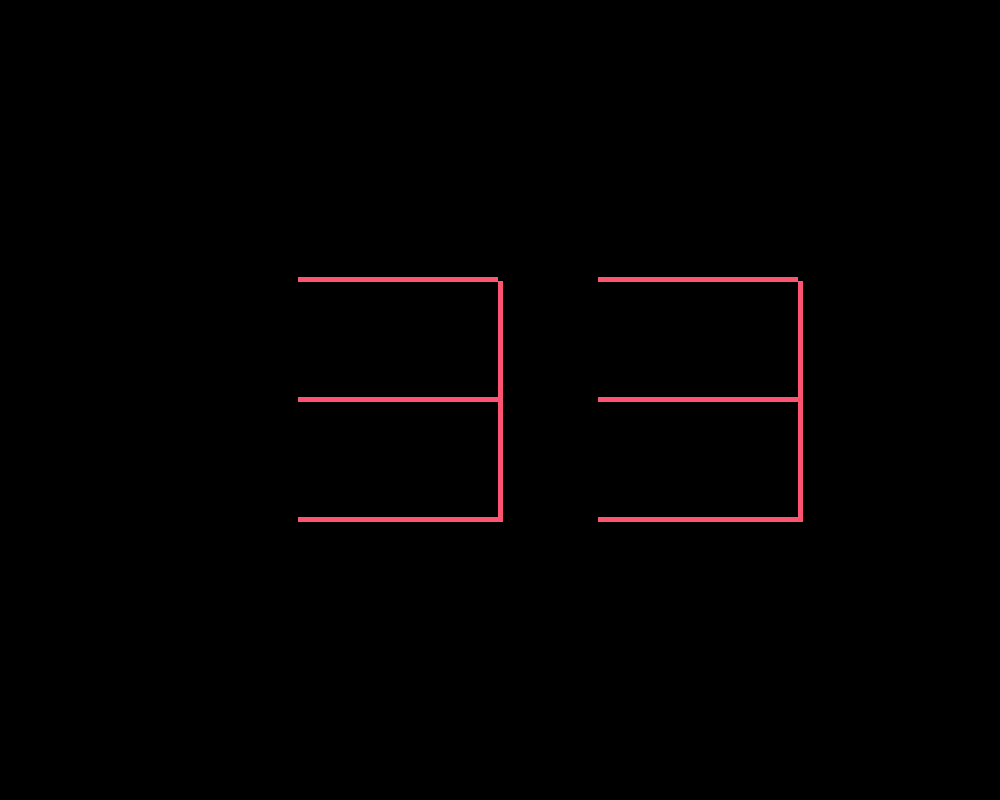

In [284]:
img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)